In [2]:
import numpy as np # linear algebra
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df =pd.read_csv("data/abalone.data.csv")

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.dtypes

Sex                            object
Length                        float64
Diameter                      float64
Height                        float64
Whole weightShucked weight    float64
Viscera weight                float64
Shell weight                  float64
Rings                         float64
Age                             int64
dtype: object

In [6]:
df['Sex'] = df['Sex'].replace({"M":0,"F":1,"I":0})

In [7]:
df.isnull().sum()

Sex                           0
Length                        0
Diameter                      0
Height                        0
Whole weightShucked weight    0
Viscera weight                0
Shell weight                  0
Rings                         0
Age                           0
dtype: int64

In [8]:
df.corr()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279
Length,0.309666,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.318626,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.298421,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weightShucked weight,0.299741,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Viscera weight,0.263991,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Shell weight,0.308444,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Rings,0.306319,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.250279,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

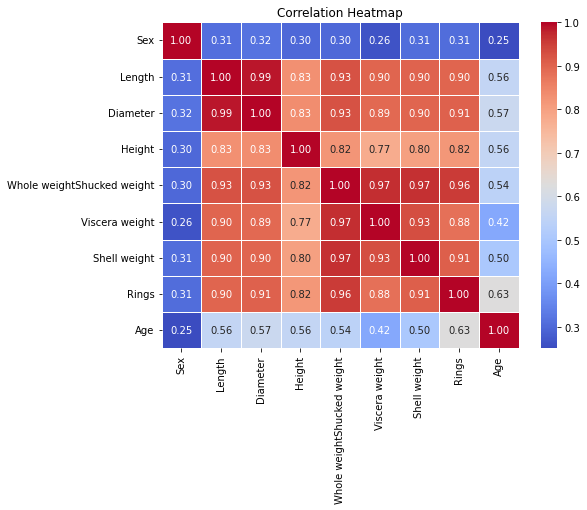

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

In [39]:
correlation_matrix = df.corr()
# Find highly correlated features
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
  
    for j in range(i):
        # print("i -- j", i , j , "===", correlation_matrix.iloc[i, j])
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Change the threshold as needed
            print("i -- j", i , j , "===", correlation_matrix.columns[i] ,"====", correlation_matrix.iloc[i, j])
            high_corr_features.add(correlation_matrix.columns[i])

print("high_corr_features",high_corr_features)    

i -- j 2 1 === Diameter ==== 0.9868115846025
i -- j 3 1 === Height ==== 0.8275536093192142
i -- j 3 2 === Height ==== 0.8336836879586538
i -- j 4 1 === Whole weightShucked weight ==== 0.9252611721489467
i -- j 4 2 === Whole weightShucked weight ==== 0.9254521015071313
i -- j 4 3 === Whole weightShucked weight ==== 0.8192207728553582
i -- j 5 1 === Viscera weight ==== 0.8979136582496655
i -- j 5 2 === Viscera weight ==== 0.8931624751432796
i -- j 5 3 === Viscera weight ==== 0.7749722929028299
i -- j 5 4 === Viscera weight ==== 0.969405456703434
i -- j 6 1 === Shell weight ==== 0.9030176990077563
i -- j 6 2 === Shell weight ==== 0.8997244291071196
i -- j 6 3 === Shell weight ==== 0.79831929752753
i -- j 6 4 === Shell weight ==== 0.9663750782730317
i -- j 6 5 === Shell weight ==== 0.9319613217425567
i -- j 7 1 === Rings ==== 0.8977055691879205
i -- j 7 2 === Rings ==== 0.905329781213082
i -- j 7 3 === Rings ==== 0.8173380147032083
i -- j 7 4 === Rings ==== 0.9553554421763288
i -- j 7 5 ==

In [ ]:
correlation_matrix = df.corr()

# Find highly correlated features
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        print("i -- j", i , j , "===", correlation_matrix.iloc[i, j])
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Change the threshold as needed
            high_corr_features.add(correlation_matrix.columns[i])
            

In [9]:
X = df.drop('Age', axis=1)
y = df['Age']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2923, 8), (1254, 8), (2923,), (1254,))

In [12]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = LR.predict(X_test)
y_pred

array([11.57498747,  9.92739009, 14.14632279, ...,  7.75579344,
       12.22051077,  8.18567629])

In [14]:
r2_score(y_test,y_pred)

0.5165623734681528

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=34,criterion="friedman_mse", random_state=0)

rfr.fit(X_train,y_train)
ypred_rfr=rfr.predict(X_test)
r2score_rfr=r2_score(y_test,ypred_rfr)
r2score_rfr

0.511502087519097